In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df= pd.read_csv('fake_reg.csv')

In [3]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


C:\Users\mrsna\anaconda3\envs\py_tf\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


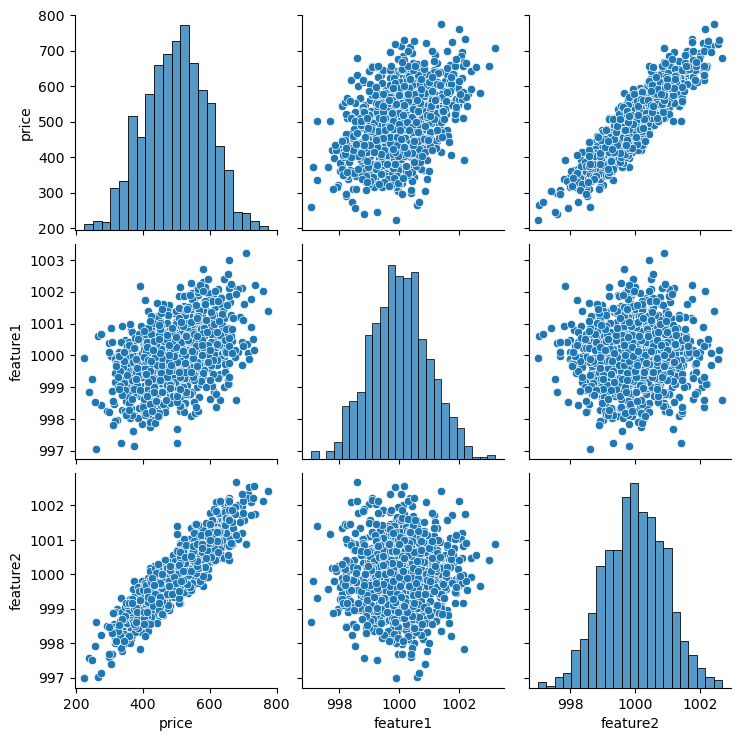

In [4]:
sns.pairplot(df)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df[['feature1','feature2']].values  ##.values return numpy array as tensorflow only deals with numpy array
y=df['price'].values

In [7]:
X

array([[ 999.78755752,  999.7660962 ],
       [ 998.86161491, 1001.04240315],
       [1000.07026691,  998.84401463],
       ...,
       [1001.45164617,  998.84760554],
       [1000.77102275,  998.56285086],
       [ 999.2322436 , 1001.45140713]])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler= MinMaxScaler()

In [12]:
scaler.fit(X_train)

MinMaxScaler()

In [13]:
X_train=scaler.transform(X_train)

In [14]:
X_test=scaler.transform(X_test)

In [15]:
X_train.min()

0.0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

### Choosing an optimizer and loss

Keep in mind what kind of problem you are trying to solve:

    # For a multi-class classification problem
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    # For a mean squared error regression problem
    model.compile(optimizer='rmsprop',
                  loss='mse')

In [17]:
model=Sequential()
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))##Adds a layer instance on top of the layer stack.
model.add(Dense(4,activation='relu'))
model.add(Dense(1))  #last cell only one output as predicting single numerical value and no activation function

# The Rectified Linear Unit (ReLU) activation function is a mathematical function used in artificial neural networks to introduce non-linearity 
# and help the network learn complex patterns

model.compile(optimizer='rmsprop',loss='mse')  ## as its a regression problem, predicting continuous value

# Training

Below are some common definitions that are necessary to know and understand to correctly utilize Keras:

* Sample: one element of a dataset.
    * Example: one image is a sample in a convolutional network
    * Example: one audio file is a sample for a speech recognition model
* Batch: a set of N samples. The samples in a batch are processed independently, in parallel. If training, a batch results in only one update to the model.A batch generally approximates the distribution of the input data better than a single input. The larger the batch, the better the approximation; however, it is also true that the batch will take longer to process and will still result in only one update. For inference (evaluate/predict), it is recommended to pick a batch size that is as large as you can afford without going out of memory (since larger batches will usually result in faster evaluation/prediction).
* Epoch: an arbitrary cutoff, generally defined as "one pass over the entire dataset", used to separate training into distinct phases, which is useful for logging and periodic evaluation.
* When using validation_data or validation_split with the fit method of Keras models, evaluation will be run at the end of every epoch.
* Within Keras, there is the ability to add callbacks specifically designed to be run at the end of an epoch. Examples of these are learning rate changes and model checkpointing (saving).

In [18]:
model.fit(x=X_train,y=y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256680.1562
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256576.2500
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256475.4531
Epoch 4/250
22/22 [==============================] - 0s 989us/step - loss: 256364.1875
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256244.6875
Epoch 6/250
22/22 [==============================] - 0s 984us/step - loss: 256114.9219
Epoch 7/250
22/22 [==============================] - 0s 1ms/step - loss: 255967.5156
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 255795.9375
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 255601.8906
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255386.3125
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255145.7188
Epoch 12/250
22/22 [==============================] - 0s 1m

In [19]:
loss_df=pd.DataFrame(model.history.history)
# model.history.history to print the loss history

<Axes: >

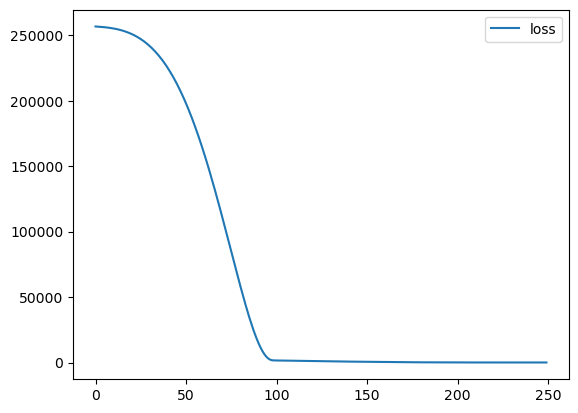

In [20]:
loss_df.plot()

In [23]:
model.evaluate(X_test,y_test,verbose=0) ## the value is showing the mse as in model we declare the loss as mse

25.362117767333984

In [25]:
###predict the data

predictions=model.predict(X_test,verbose=0)

In [31]:
predictions.shape

(300, 1)

In [32]:
type(predictions)

numpy.ndarray

In [44]:
df_result=pd.DataFrame(data=predictions,columns=['y_predict'])
df_result

,y_predict
0,405.739410
1,624.128784
2,592.678345
3,572.834045
4,367.139954
...,...
295,529.617676
296,516.012146
297,610.220825
298,417.365845


In [45]:
df_result['y_true']=y_test
df_result

,y_predict,y_true
0,405.739410,402.296319
1,624.128784,624.156198
2,592.678345,582.455066
3,572.834045,578.588606
4,367.139954,371.224104
...,...,...
295,529.617676,525.704657
296,516.012146,502.909473
297,610.220825,612.727910
298,417.365845,417.569725


<Axes: xlabel='y_predict', ylabel='y_true'>

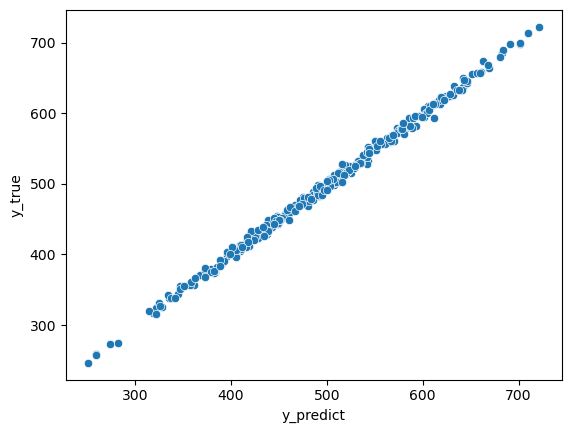

In [46]:
sns.scatterplot(data=df_result,x='y_predict',y='y_true')

<Axes: >

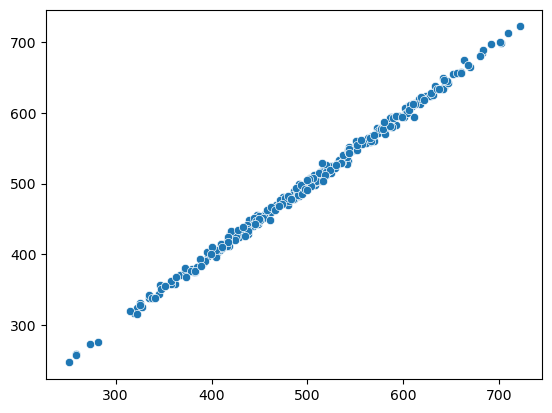

In [43]:
# another way to plot directly
sns.scatterplot(x=predictions.reshape(-1,),y=y_test)

In [57]:
###predict on new data set
new_gem=[[998,1000],[997,999]]

In [58]:
new_gem_trans=scaler.transform(new_gem)

In [59]:
model.predict(new_gem_trans)  ##420.237 is the result

1/1 [==============================] - 0s 53ms/step


array([[420.237  ],
       [291.61813]], dtype=float32)